# Random Forests
## Curso Data Science and Machine Learning
### DataSet: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
### Course: https://www.youtube.com/watch?v=LWEZmFpZkYw&list=PLbnAsJ6zlidu7_eG2XJpfbHmVQy22BrXv&index=30

### Imports:

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from dataclasses import dataclass
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

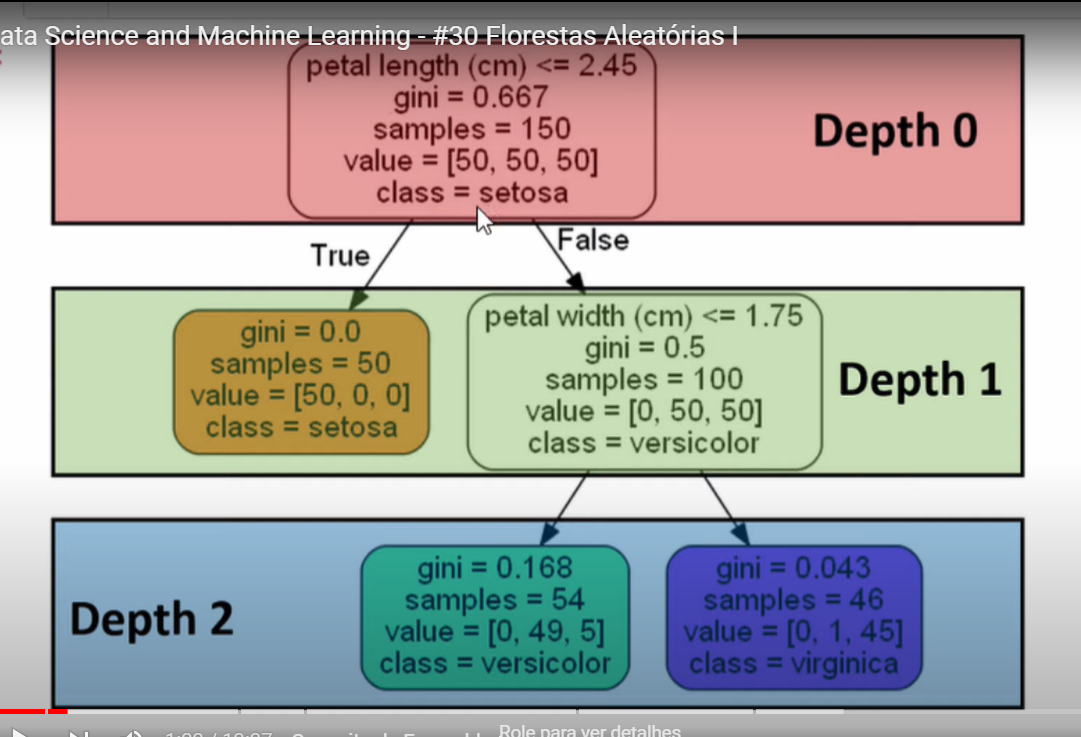

In [2]:
# Caminho para a imagem
caminho_imagem = "C:\\Users\\kadek\\Downloads\\Random Forests\\Raw\\tree.png"

# Exibir a imagem no notebook
Image(filename=caminho_imagem, width=600 ) # chama a imagem inline


### Importando Dataframe:

In [3]:
df = pd.read_csv("Raw\\Social_Network_Ads.csv" )

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Análise Exploratória:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Preparando os dados, deletando, e fatorizando:    

In [8]:
del df["User ID"]

In [9]:
idCat, cat = pd.factorize(df["Gender"])
df['GenderCat'] = idCat
# Male = 0 / female = 1

In [10]:
del df["Gender"]

In [11]:
df.head()

,Age,EstimatedSalary,Purchased,GenderCat
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


## Análise Gráfica:

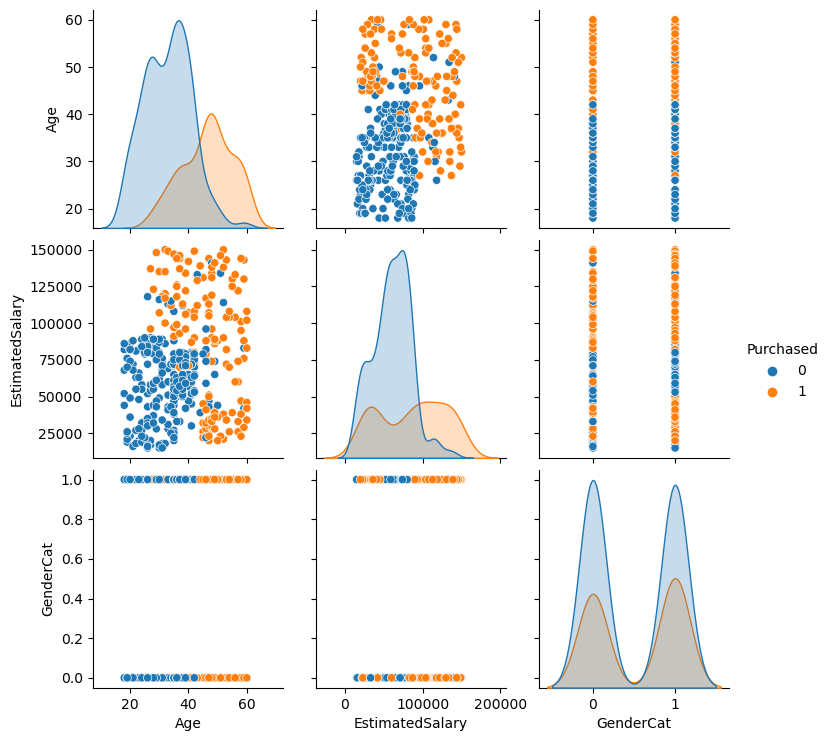

In [12]:
sns.pairplot(df, hue="Purchased")

<AxesSubplot:>

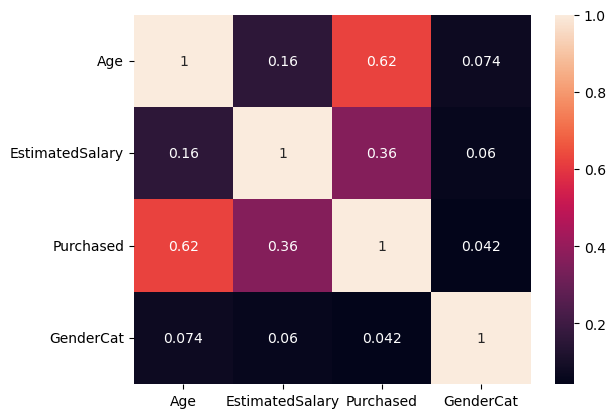

In [13]:
sns.heatmap(df.corr(), annot=True)

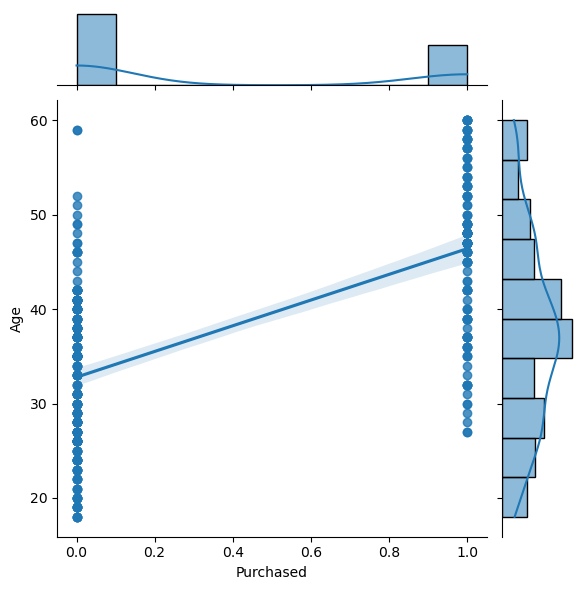

In [14]:
sns.jointplot(x="Purchased", y="Age", data=df, kind="reg")

<AxesSubplot:xlabel='Purchased', ylabel='count'>

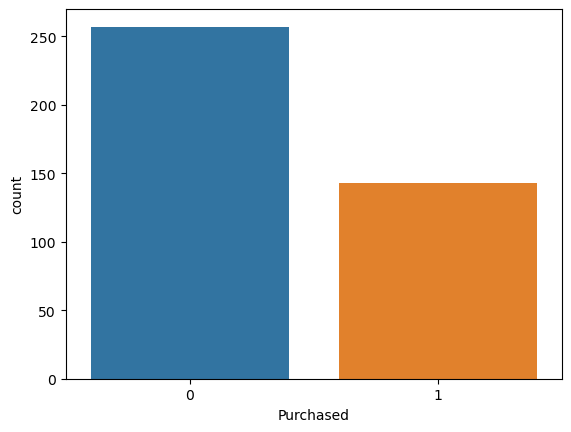

In [15]:
sns.countplot(x="Purchased", data = df)

In [16]:
df["Purchased"].value_counts()

# 257 pessoas das 400 não compraram, e 143 pessoas compraram!

0    257
1    143
Name: Purchased, dtype: int64

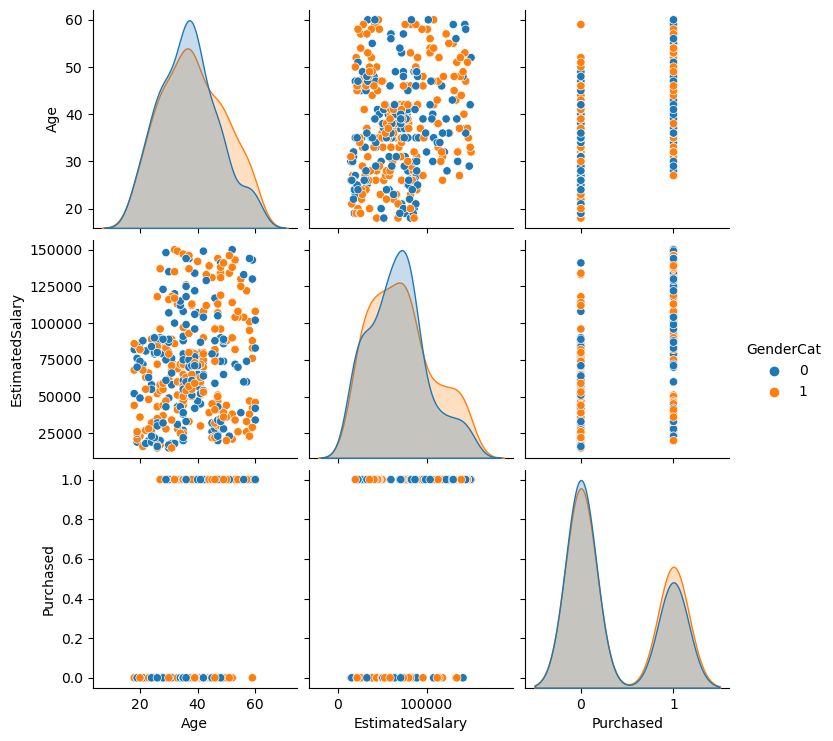

In [17]:
sns.pairplot(df,hue="GenderCat")

# está bem misturado, não é relevante o gênero das pessoas que compram pelo anúncio

### Divisão dos dados em treino e teste:

In [18]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]
X.head()

,Age,EstimatedSalary,GenderCat
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [21]:
X_train.shape

(320, 3)

In [22]:
y_test.shape

(80,)

### Escalonamento dos Dados

#### Aqui igualmente em árvores de decisão não é preciso escalonar os dados!!!

## Escolhendo os melhores hiperparâmetros:

In [28]:
params = [
    {
        "max_depth":[4,8,12],
        "max_features":[1,2,3],
        "min_samples_leaf":[4,8,12],
        "min_samples_split":[4,8,12]
    }
]
ins = RandomForestClassifier()
grid_search = GridSearchCV(ins, params, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 12,
 'min_samples_split': 12}

### Ajustando e fazendo previsões:

In [32]:
ins = RandomForestClassifier(max_depth=4, max_features=1, min_samples_leaf=12, min_samples_split=12)
ins.fit(X_train, y_train)
pred = ins.predict(X_test)
pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [33]:
y_test[:10]

248    0
318    1
173    0
285    1
184    0
235    1
124    0
282    1
151    0
169    0
Name: Purchased, dtype: int64

### Desempenho do algorítmo:

In [34]:
ins.score(X_test, y_test)

0.9125

In [35]:
cross = cross_val_score(ins, X_test, y_test, cv=10, scoring="accuracy")
final = sum(cross) / len(cross)
final

0.825

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        49
           1       0.90      0.87      0.89        31

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.91        80
weighted avg       0.91      0.91      0.91        80



In [37]:
print(confusion_matrix(y_test, pred))

[[46  3]
 [ 4 27]]


### Testando novos dados:

In [42]:
# pessoas que não compram = 0 / pessoas que compram = 1
newX = pd.DataFrame([
    [20, 29000, 0 ]
], columns=X.columns)
pred2 = ins.predict(newX)
pred2

array([0], dtype=int64)

In [43]:
# se vc muda a idade de 20 para 48 a pessoa vai comprar:
newX = pd.DataFrame([
    [48, 29000, 0 ]
], columns=X.columns)
pred2 = ins.predict(newX)
pred2

array([1], dtype=int64)